In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [3]:
# Laddar datasetet och extraherar filvägar och etiketter från filnamnen
#labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
paths = []
labels = []

# Traversera alla filer i datasetets katalogstruktur
for dirname, _, filenames in os.walk(r'D:\DataSets\AudioWAV'):
  for filename in filenames:
    # Lagra fullständig filväg
    paths.append(os.path.join(dirname, filename))
    # Extrahera etikett från filnamnet
    label = filename.split('_')[-2]
    
    match label:
        case 'ANG':
          label = 'angry' 
        case 'DIS':
          label = 'disgust'
        case 'FEA':
          label = 'fear'
        case 'HAP':
          label = 'happy'
        case 'NEU':
          label = 'neutral'
        case 'SAD':
          label = 'sad'


    print(label)
    #label = label.split('.')[0]
    #print(label)
    labels.append(label.lower())
print('Dataset is loaded')


angry
disgust
fear
happy
neutral
sad
angry
angry
angry
disgust
disgust
disgust
fear
fear
fear
happy
happy
happy
neutral
sad
sad
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
angry
angry
disgust
disgust
disgust
fear
fear
fear
happy
happy
happy
neutral
sad
sad
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
sad
angry
disgust
fear
happy
neutral
sad
angry
disgust
fear
happy
neutral
sad
angr

In [4]:
## Skapar en DataFrame för att organisera filvägar och etiketter för vidare analys och modellträning

df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels

# Visar de första raderna i DataFrame för att bekräfta att data har laddats korrekt
df.head()

,speech,labels
0,D:\DataSets\AudioWAV\1001_DFA_ANG_XX.wav,angry
1,D:\DataSets\AudioWAV\1001_DFA_DIS_XX.wav,disgust
2,D:\DataSets\AudioWAV\1001_DFA_FEA_XX.wav,fear
3,D:\DataSets\AudioWAV\1001_DFA_HAP_XX.wav,happy
4,D:\DataSets\AudioWAV\1001_DFA_NEU_XX.wav,neutral


<Axes: xlabel='count', ylabel='labels'>

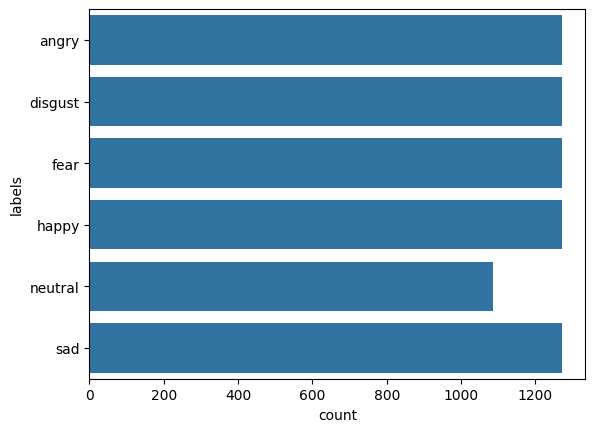

In [6]:
# 
sns.countplot(df['labels'])

In [7]:
# Visualiserar ljudvågsformen för en given ljuddata med emotion som titel
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

# Skapar ett spektrogram för en given ljuddata med emotion som titel
def spectogram(data, sr, emotion):
  x = librosa.stft(data) 
  xdb = librosa.amplitude_to_db(abs(x)) 
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

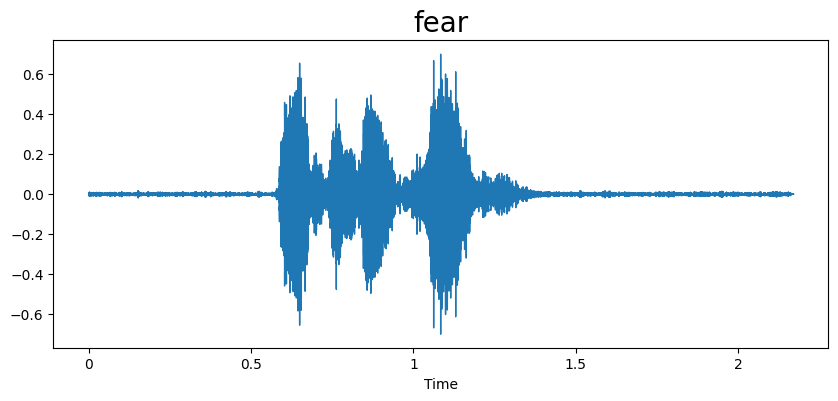

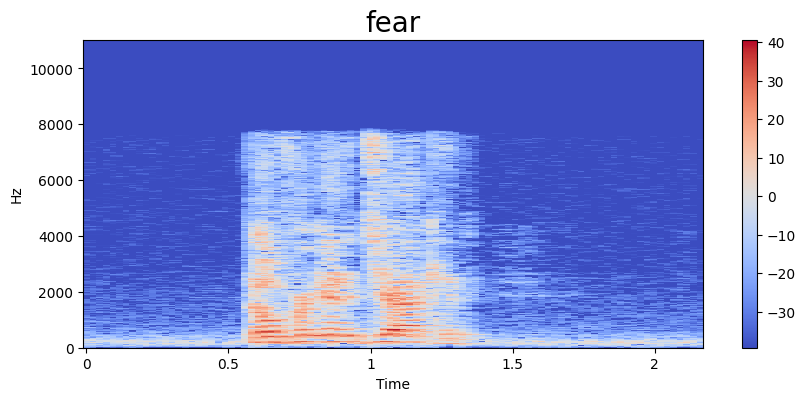

In [8]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'fear'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['labels'] == emotion])[0]
print(path)

D:\DataSets\AudioWAV\1001_DFA_FEA_XX.wav


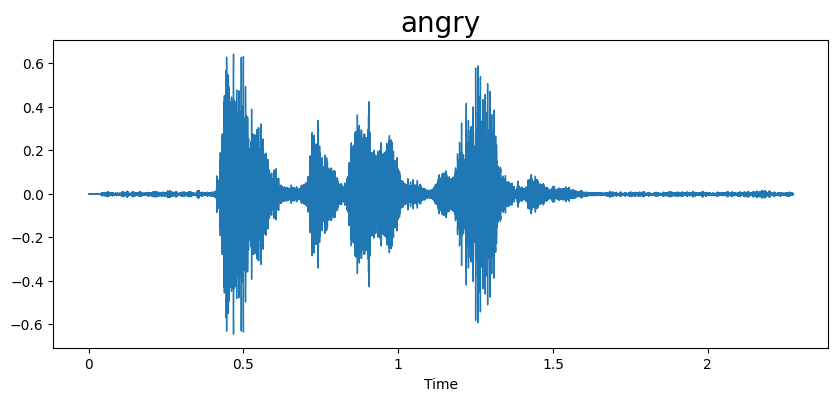

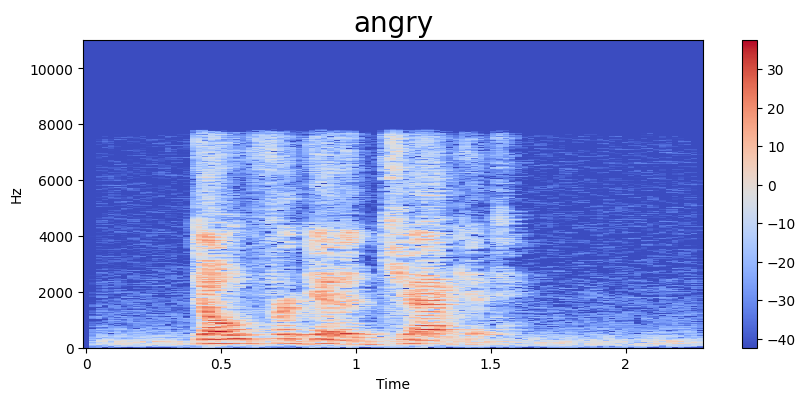

In [10]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'angry'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

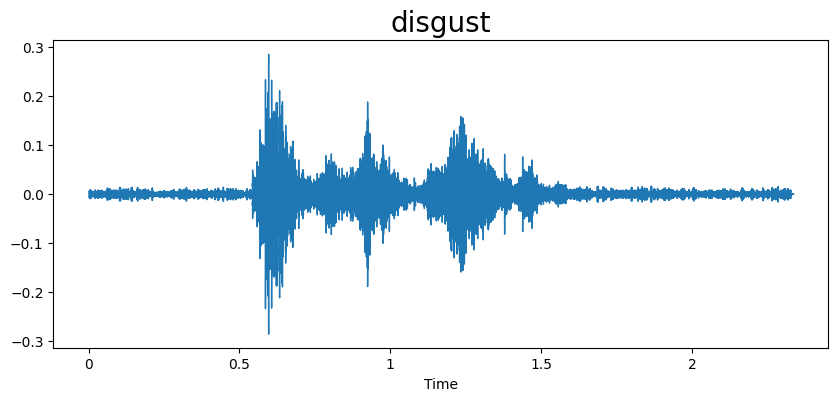

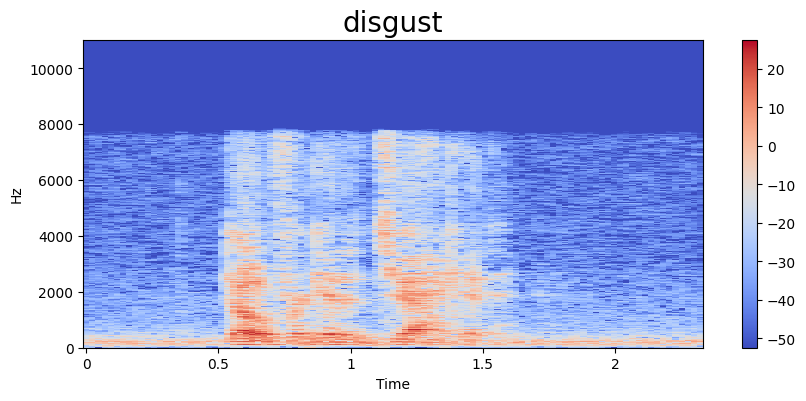

In [11]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'disgust'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

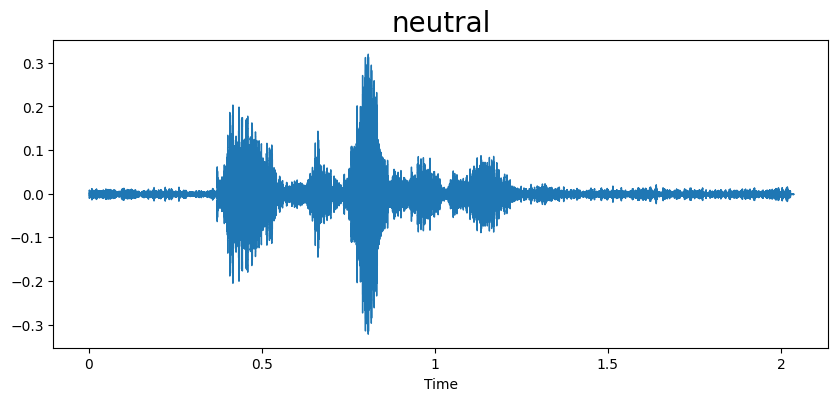

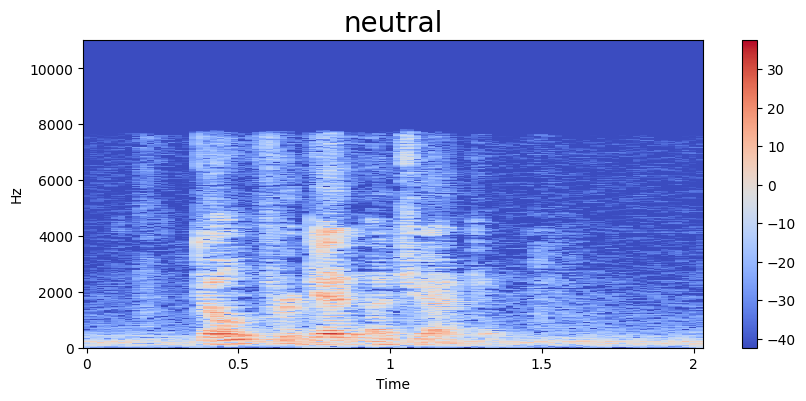

In [12]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'neutral'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

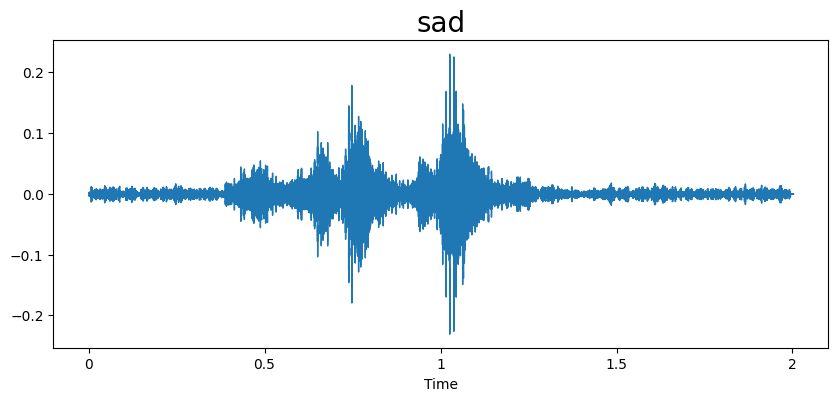

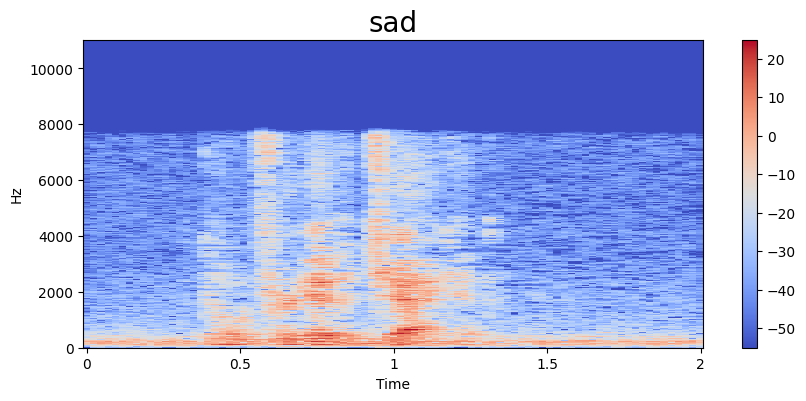

In [13]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'sad'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

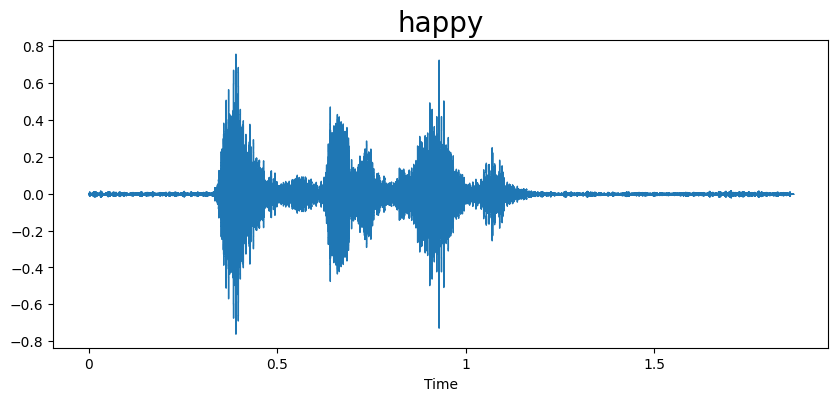

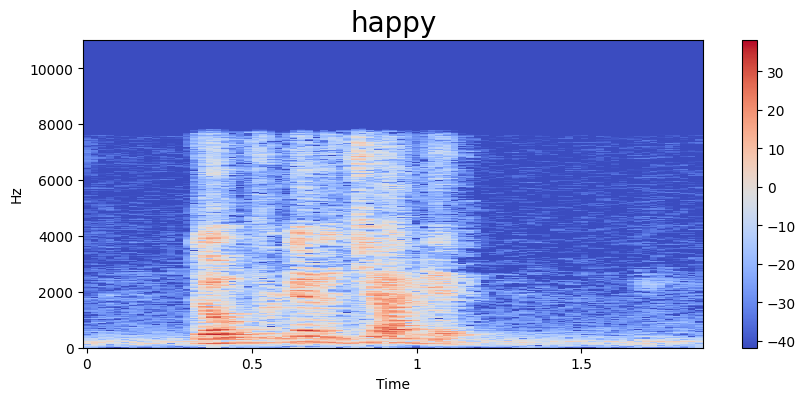

In [14]:
# kollar så att datan ser bra ut och se eventuella skillnader mellan känslor
emotion = 'happy'
path = np.array(df['speech'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [15]:
# Konverterar ljudfilen till MFCC (Mel-Frequency Cepstral Coefficients) eftersom det är mer lämpligt för 
# att skapa en känsloigenkänningsmodell

def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [16]:
# Checkar funktionen
extract_mfcc(df['speech'][0])

array([-3.2420966e+02,  1.2839470e+02, -1.9360773e+01,  4.5353882e+01,
       -7.7810597e+00,  1.6801313e+01, -2.5136723e+01, -2.0426500e+00,
       -1.2736441e+01, -6.0262311e-01, -1.2893606e+01, -1.9871272e+00,
       -2.5880756e+00, -1.6210602e+01,  1.1422585e+01, -1.4656595e+01,
       -4.7940116e+00, -4.4950323e+00, -2.2649436e-01, -1.0050797e+01,
       -6.2041969e+00, -4.9112763e+00, -8.6487637e+00, -1.6191192e+00,
       -5.5614214e+00,  3.7206147e+00, -6.3599520e+00,  1.2718615e-01,
       -3.5127897e+00, -1.8107889e+00, -1.8642120e+00, -2.1195211e+00,
       -1.8940723e-01, -4.1996927e+00, -3.3023124e+00, -7.4549875e+00,
       -2.4175289e+00, -5.8262515e+00, -1.8155661e+00, -3.8114743e+00],
      dtype=float32)

In [17]:
# Extraherar MFCC (Mel-Frequency Cepstral Coefficients) för varje ljudfil
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [19]:
# Ändrar datatypen till numpy array
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [20]:
type(X)

numpy.ndarray

In [21]:
## Lägger till en extra dimension till X för att uppfylla modellens inputkrav
X = np.expand_dims(X, -1)
X.shape


(7442, 40, 1)

In [22]:
# Konverterar alla labels till one-hot kodning för att möjliggöra klassificering av modellen
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])
y = y.toarray()

In [23]:
# Ckeckar dimensioner
y.shape

(7442, 6)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Skapar en sekventiell modell för att klassificera ljuddata
model = Sequential([
    # Första konvolutionslagret för att extrahera funktioner från tidsseriedata
    Conv1D(32, kernel_size=(3), activation='relu', input_shape=(40, 1)),  
    MaxPooling1D(pool_size=(2)),  # Minskar dimensionerna och behåller viktiga funktioner
    Dropout(0.3),  # Förhindrar överanpassning

    # Andra konvolutionslagret för att extrahera mer komplexa funktioner
    Conv1D(64, kernel_size=(3), activation='relu'),
    MaxPooling1D(pool_size=(2)),  # Minskar dimensionerna ytterligare
    Dropout(0.3),  # Förhindrar överanpassning

    Flatten(),  # Omvandlar data till en dimension för fullt anslutna lager

    # Första fullt anslutna lagret för att kombinera extraherade funktioner
    Dense(128, activation='relu'),
    Dropout(0.3),  # Förhindrar överanpassning
    BatchNormalization(),  # Normaliserar data för snabbare konvergens och stabilitet

    # Andra fullt anslutna lagret för ytterligare funktionkombination
    Dense(64, activation='relu'),
    Dropout(0.3),  # Förhindrar överanpassning
    BatchNormalization(),  # Normaliserar data

    # Tredje fullt anslutna lagret för ytterligare funktionkombination
    Dense(32, activation='relu'),
    Dropout(0.3),  # Förhindrar överanpassning

    # Utgångslager med softmax-aktivering för klassificering i 6 kategorier
    Dense(6, activation='softmax')
])

# Kompilering av modellen med kategorisk korsentropi som förlustfunktion och Adam som optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Sammanfattar modellens arkitektur
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 38, 32)            128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 19, 32)            0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 19, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 8, 64)            

In [44]:
# Sparar modellen så att den kan användas senare, samt tillämpar olika regulariseringsmetoder för att förbättra modellen

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Checkpoint för att spara den bästa modellen baserat på valideringsnoggrannhet
checkpoint = ModelCheckpoint("./speechgg2lt.tf", monitor="val_accuracy", verbose=1, save_best_only=True, mode='max')

# Early stopping för att avbryta träningen när noggrannheten slutar förbättras för att undvika överträning
early_stopping = EarlyStopping(monitor='accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# Reduce learning rate on plateau för att minska inlärningshastigheten när noggrannheten slutar förbättras
reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]


In [45]:
# Tränar modellen med träningsdata och validerar med uppdelad träningsdata
# Använder callbacks för att spara bästa modell, avbryta vid överträning och justera inlärningshastigheten

history = model.fit(
    X, 
    y, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=64, 
    shuffle=True, 
    callbacks=callbacks_list
    )

Epoch 1/100
92/94 [============================>.] - ETA: 0s - loss: 2.0703 - accuracy: 0.1792
Epoch 1: val_accuracy improved from -inf to 0.21424, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 4s 30ms/step - loss: 2.0680 - accuracy: 0.1794 - val_loss: 1.7503 - val_accuracy: 0.2142 - lr: 0.0010
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 1.8432 - accuracy: 0.2266
Epoch 2: val_accuracy improved from 0.21424 to 0.31028, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 3s 28ms/step - loss: 1.8432 - accuracy: 0.2266 - val_loss: 1.6608 - val_accuracy: 0.3103 - lr: 0.0010
Epoch 3/100
91/94 [============================>.] - ETA: 0s - loss: 1.7547 - accuracy: 0.2495
Epoch 3: val_accuracy did not improve from 0.31028
94/94 [==============================] - 1s 8ms/step - loss: 1.7538 - accuracy: 0.2493 - val_loss: 1.6288 - val_accuracy: 0.3062 - lr: 0.0010
Epoch 4/100
92/94 [============================>.] - ETA: 0s - loss: 1.7033 - accuracy: 0.2697
Epoch 4: val_accuracy did not improve from 0.31028
94/94 [==============================] - 1s 12ms/step - loss: 1.7018 - accuracy: 0.2711 - val_loss: 1.6411 - val_accuracy: 0.2908 - lr: 0.0010
Epoch 5/100
87/94 [==========================>...] - ETA: 0s - loss: 1.6632 - accuracy: 0.2866
Epoch 5: val_accuracy improved from 0.31028 to 0.32169, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 3s 32ms/step - loss: 1.6643 - accuracy: 0.2851 - val_loss: 1.5909 - val_accuracy: 0.3217 - lr: 0.0010
Epoch 6/100
89/94 [===========================>..] - ETA: 0s - loss: 1.6459 - accuracy: 0.2776
Epoch 6: val_accuracy did not improve from 0.32169
94/94 [==============================] - 1s 8ms/step - loss: 1.6449 - accuracy: 0.2782 - val_loss: 1.5727 - val_accuracy: 0.3203 - lr: 0.0010
Epoch 7/100
89/94 [===========================>..] - ETA: 0s - loss: 1.6127 - accuracy: 0.3027
Epoch 7: val_accuracy improved from 0.32169 to 0.32639, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 3s 37ms/step - loss: 1.6128 - accuracy: 0.3019 - val_loss: 1.5587 - val_accuracy: 0.3264 - lr: 0.0010
Epoch 8/100
93/94 [============================>.] - ETA: 0s - loss: 1.5990 - accuracy: 0.3160
Epoch 8: val_accuracy improved from 0.32639 to 0.32841, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 3s 28ms/step - loss: 1.5990 - accuracy: 0.3160 - val_loss: 1.5618 - val_accuracy: 0.3284 - lr: 0.0010
Epoch 9/100
94/94 [==============================] - ETA: 0s - loss: 1.6058 - accuracy: 0.3155
Epoch 9: val_accuracy improved from 0.32841 to 0.34050, saving model to .\speechgg2lt.tf
INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


INFO:tensorflow:Assets written to: .\speechgg2lt.tf\assets


94/94 [==============================] - 3s 30ms/step - loss: 1.6058 - accuracy: 0.3155 - val_loss: 1.5520 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 10/100
90/94 [===========================>..] - ETA: 0s - loss: 1.5842 - accuracy: 0.3247
Epoch 10: val_accuracy did not improve from 0.34050
94/94 [==============================] - 1s 8ms/step - loss: 1.5848 - accuracy: 0.3234 - val_loss: 1.5521 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 11/100
91/94 [============================>.] - ETA: 0s - loss: 1.5707 - accuracy: 0.3341
Epoch 11: val_accuracy did not improve from 0.34050
94/94 [==============================] - 1s 9ms/step - loss: 1.5700 - accuracy: 0.3345 - val_loss: 1.5608 - val_accuracy: 0.3398 - lr: 0.0010
Epoch 12/100
88/94 [===========================>..] - ETA: 0s - loss: 1.5777 - accuracy: 0.3271
Epoch 12: val_accuracy did not improve from 0.34050
94/94 [==============================] - 1s 8ms/step - loss: 1.5767 - accuracy: 0.3261 - val_loss: 1.5564 - val_accuracy: 0.3271 

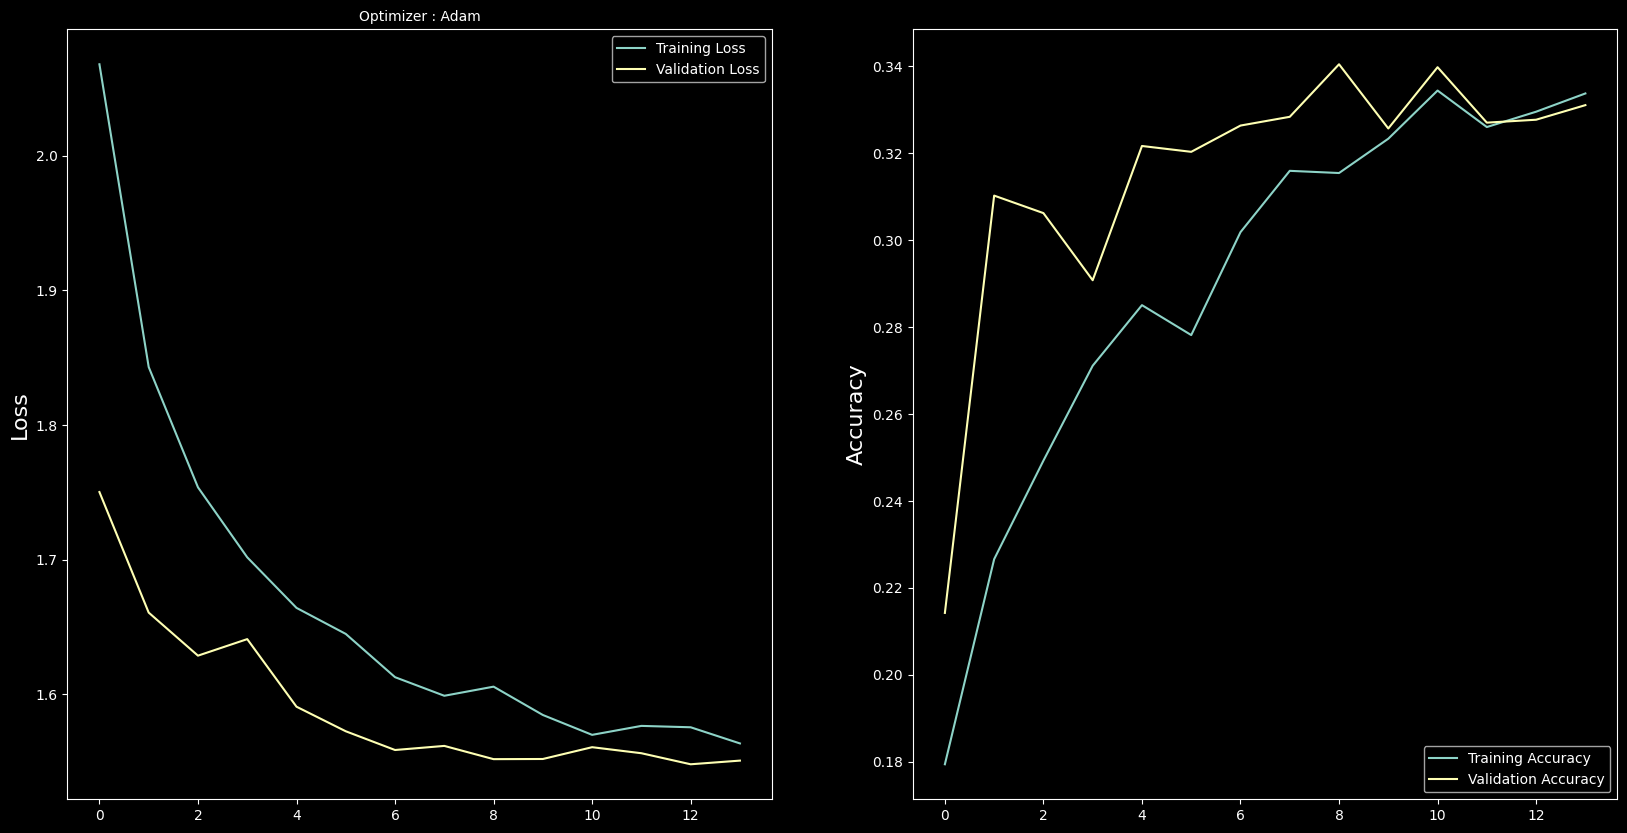

In [46]:
## Visualiserar tränings- och valideringsförlust samt noggrannhet för att bedöma modellens prestanda och avgöra om ytterligare träning behövs

plt.style.use('dark_background')

plt.figure(figsize=(20, 10))

# Plot för tränings- och valideringsförlust
plt.subplot(1, 2, 1)
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot för tränings- och valideringsnoggrannhet
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()